# 사전 기반 감성분석

- 아래코드에서 사용된 SentiWord_info.json의 출처 및 저작권자
- 작성자 : 온병원, 박상민, 나철원
- 소속 : 군산대학교 소프트웨어융합공학과 Data Intelligence Lab
- 홈페이지 : dilab.kunsan.ac.kr
- 작성일 : 2018.05.14
- 뜻풀이 데이터 출처 : https://github.com/mrchypark/stdkor
- 신조어 데이터 출처 : https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%ED%84%B0%EB%84%B7_%EC%8B%A0%EC%A1%B0%EC%96%B4_%EB%AA%A9%EB%A1%9D
- 이모티콘 데이터 출처: https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%AA%A8%ED%8B%B0%EC%BD%98
- SentiWordNet_3.0.0_20130122 데이터 출처 : http://sentiwordnet.isti.cnr.it/
- SenticNet-5.0 데이터 출처 : http://sentic.net/
- 감정단어사전0603 데이터 출처 : http://datascience.khu.ac.kr/board/bbs/board.php?bo_table=05_01&wr_id=91
- 김은영, “국어 감정동사 연구”, 2004.02, 학위논문(박사) - 전남대학교 국어국문학과 대학원

In [8]:
import json
import pandas as pd

SentiWord = pd.read_json('./py_data/sentimental/SentiWord_info.json',encoding='utf-8')

display(SentiWord.head())
display(SentiWord.tail())

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1


,word,word_root,polarity
14838,반신반의하다,반신반의,0
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1
14842,알쏭달쏭하다,알쏭달쏭,-1


In [40]:
def neg_pos(word):
    temp = pd.DataFrame()
    
    global SentiWord
    temp = SentiWord[(SentiWord['word'] == word) | (SentiWord['word_root'] == word)]
    
    try:
        word_tul = (word,temp['polarity'][temp.index[0]])
    except IndexError:
        word_tul = (word,0)
    
    return word_tul

In [41]:
neg_pos('좋')

('좋', 2)

- 감정사전 추가

In [65]:
SentiWord.loc[len(SentiWord)]=['코로나','코로나',-2] 
SentiWord.tail()

,word,word_root,polarity
14839,신비롭다,신비,1
14840,아리송하다,아리송,-1
14841,알쏭하다,알쏭하,-1
14842,알쏭달쏭하다,알쏭달쏭,-1
14843,코로나,코로나,-2


In [66]:
add_txt_lst =[['낚시','낚시',-1],['원투','원투',1],['마음','마음',1]]

for add in add_txt_lst:
    SentiWord.loc[len(SentiWord)] = add
SentiWord.tail()

,word,word_root,polarity
14842,알쏭달쏭하다,알쏭달쏭,-1
14843,코로나,코로나,-2
14844,낚시,낚시,-1
14845,원투,원투,1
14846,마음,마음,1


# 낚시 카페 크롤링 데이터

In [43]:
df = pd.read_csv('./py_data/sentimental/원투낚시 카페 로그인 크롤링 저장.csv', encoding='cp949')
del df['Unnamed: 0']
df.head()

,제목,본문,댓글
0,원투로 고기 잘잡는방법,게시글을 보다가원투를 무시하는 지인말을 듣고자존심상해하는 글을 보았습니다같은 원투...,스승님이되주십쇼 ㅋㅋ와우속이 시원하네요좋은 정보 진심으로 감사합니다장문 정독하며 한...
1,묵호항 조과2,크 묵호항 오늘 운이 어마무시하네요작은ㅇㅐ 하나 묶음추로 발밑에서 나와주고씨알 좋은...,내항 어디쯤인지 여쭤보믄 실례일까여위치를 정확히 몰라서여기 수산시장쪽입니다 ㅎ로이도...
2,어제 거제도 능포갔다왔어요,안녕하세요 낚시 일주일좀되었어요원투낚시 하고있고 거제도쪽이 그래도 잡힌다고 하여 어...,용치 능포 보다는 지세포가 더 좋습니다 능포 공원 오픈 전까지는 지세포가 나은거 같...
3,원투 캐스팅시 채비꼬임목줄꼬임에 대해서,질문게시판보고 댓글로만 달기에는 내용이 좀 길거같아 게시물로 써봅니다초보분들이 모르...,좋은 팁 감사합니다자세한 설명 감사합니다감사합니다꼬임방지봉 쓰심 편합니다팁 감사합...
4,원투낚시 채비 밑걸림 방지 자작,추운 겨울 갈때도 없고하여 원투 채비 밑걸림 방지 적용해봤습니다유튜버에서 스프링도 ...,정렬 잘하십니다 그 능력 부럽습니다전 귀차니즘으로 잘못함 ㅠㅠ알리에서 딸애 머리 고...


- 본문 텍스트만 모으기

In [45]:
total_text=""

for i in range(0, len(df)):
    text = str(df['본문'].loc[i])
    total_text = total_text + " " + text

In [46]:
total_text[:100]

' 게시글을 보다가원투를  무시하는 지인말을 듣고자존심상해하는 글을 보았습니다같은 원투인으로써 저도잠시 불끈했는데요그래서원투낚시에 대해 주절주절해보겠습니다원투는원거리투척이 정설이지만'

In [67]:
from konlpy.tag import Okt

okt = Okt()
morphs = okt.morphs(total_text)

In [68]:
print(morphs[:100])

['게시', '글', '을', '보다가', '원투', '를', '무시', '하는', '지인말을', '듣고', '자존심', '상해', '하', '는', '글', '을', '보았습니다', '같은', '원투', '인', '으로써', '저', '도잠', '시', '불끈', '했는데요', '그래서', '원투', '낚시', '에', '대해', '주절주절', '해보겠습니다', '원투', '는', '원거리', '투척', '이', '정설', '이지만', '저', '는', '원하는', '지점', '의', '투척', '이', '더', '맞다고', '생각', '하는', '1', '인', '입니다', '근', '투도', '중투', '도', '원투', '도', '원투', '낚시', '이기', '때문', '입니다오', '늘', '은', '남', '보다', '고기', '잘', '잡을수있는', '방법', '을', '정리', '해볼까', '합니다', '1', '포인트', '탐사', '원투', '는', '찌낚', '처럼', '밑밥', '을', '주지', '도루', '어', '처럼', '미끼', '에', '액션', '을', '주지', '도', '않습니다', '필드', '에', '나']


- 글자 수가 2개 이상인 단어만 포함

In [72]:
morphs_up = [m for m in morphs if len(m) > 1]

In [75]:
print(morphs_up[:100])

['게시', '보다가', '원투', '무시', '하는', '지인말을', '듣고', '자존심', '상해', '보았습니다', '같은', '원투', '으로써', '도잠', '불끈', '했는데요', '그래서', '원투', '낚시', '대해', '주절주절', '해보겠습니다', '원투', '원거리', '투척', '정설', '이지만', '원하는', '지점', '투척', '맞다고', '생각', '하는', '입니다', '투도', '중투', '원투', '원투', '낚시', '이기', '때문', '입니다오', '보다', '고기', '잡을수있는', '방법', '정리', '해볼까', '합니다', '포인트', '탐사', '원투', '찌낚', '처럼', '밑밥', '주지', '도루', '처럼', '미끼', '액션', '주지', '않습니다', '필드', '가보면', '처음', '가는', '대부분', '일텐데', '많은', '문자', '분들', '그냥', '파워', '던지고', '그냥', '시간', '되었다싶으면', '회수', '하고', '그냥', '무한', '반복', '전부', '입니다', '그리고', '못잡으면', '바람', '수온', '이럴', '조사', '라인', '이라도', '면개', '초보', '와서', '라인', '바람', '쳤다고', '투덜투덜', '물론']


In [77]:
print(len(morphs))
print(len(morphs_up))
print(f'감소된 단어 수: {len(morphs)-len(morphs_up)}')

17668
11722
감소된 단어 수: 5946


In [78]:
from tqdm import tqdm

neg_lst = []
pos_lst = []
unkwon_lst = []

for morph in tqdm(morphs_up,'긍/부정어 분석 중...'):
    result = neg_pos(morph)
    if result[1] > 0:
        pos_lst.append(result[0])
    elif result[1] < 0:
        neg_lst.append(result[0])
    elif result[1] == 0:
        unkwon_lst.append(result[0])

긍/부정어 분석 중...: 100%|█████████████████████████████████████████████████████| 11722/11722 [00:23<00:00, 494.73it/s]


In [61]:
# 긍부정 사전 추가 전
print('긍정키워드 수:',len(pos_lst),'개')
print('부정키워드 수:',len(neg_lst),'개')
print('중립 or unkwon 키워드 수:',len(unkwon_lst),'개')

긍정키워드 수: 835 개
부정키워드 수: 1641 개
중립 or unkwon 키워드 수: 15192 개


In [80]:
# 긍부정 사전 추가 & 글자 수 2개 이상
print('긍정키워드 수:',len(pos_lst),'개')
print('부정키워드 수:',len(neg_lst),'개')
print('중립 or unkwon 키워드 수:',len(unkwon_lst),'개')

긍정키워드 수: 681 개
부정키워드 수: 744 개
중립 or unkwon 키워드 수: 10297 개


- 단어 출현 빈도 세기

In [81]:
from collections import Counter     # jdk에서 제공하는 라이브러리

pos_count= dict(Counter(pos_lst).most_common())   # 내림차순 정렬
neg_count= dict(Counter(neg_lst).most_common())   # 내림차순 정렬
unkwon_count= dict(Counter(unkwon_lst).most_common())   # 내림차순 정렬

# 파이 차트

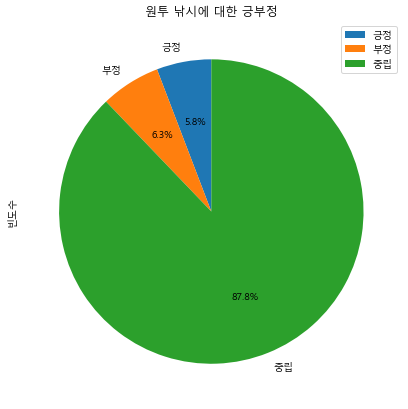

In [98]:
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = 'C:\windows/fonts/malgun.ttf').get_name()
rc('font',family = font_name)

frequency = [len(pos_lst),len(neg_lst),len(unkwon_lst)]
labels = ['긍정','부정','중립']

# gebu = pd.DataFrame({'빈도수':frequency}, index=labels)
gebu = pd.DataFrame(frequency, columns=['빈도수'], index = labels)
gebu['빈도수'].plot(kind='pie',figsize=(7,7), autopct = '%1.1f%%', title = '원투 낚시에 대한 긍부정', 
                 legend = True, startangle=90)

plt.show()

In [93]:
print(frequency)
print(labels)

[681, 744, 10297]
['긍정', '부정', '중립']


In [94]:
gebu

,빈도수
긍정,681
부정,744
중립,10297


- 긍정과 부정에 대해서만 출력

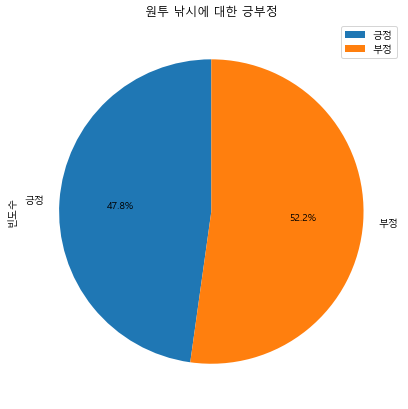

In [97]:
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = 'C:\windows/fonts/malgun.ttf').get_name()
rc('font',family = font_name)

frequency = [len(pos_lst),len(neg_lst)]
labels = ['긍정','부정']

# gebu = pd.DataFrame({'빈도수':frequency}, index=labels)
gebu = pd.DataFrame(frequency, columns=['빈도수'], index = labels)
gebu['빈도수'].plot(kind='pie',figsize=(7,7), autopct = '%1.1f%%', title = '원투 낚시에 대한 긍부정', 
                 legend = True, startangle=90)

plt.show()

# 불용어 제거
- https://www.ranks.nl/stopwords/
- https://www.ranks.nl/stopwords/korean

In [105]:
with open('./py_data/sentimental/stopwords_korean_ranknl.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()

In [106]:
print(len(stopwords))
print(stopwords[:100])

675
['아\n', '휴\n', '아이구\n', '아이쿠\n', '아이고\n', '어\n', '나\n', '우리\n', '저희\n', '따라\n', '의해\n', '을\n', '를\n', '에\n', '의\n', '가\n', '으로\n', '로\n', '에게\n', '뿐이다\n', '의거하여\n', '근거하여\n', '입각하여\n', '기준으로\n', '예하면\n', '예를 들면\n', '예를 들자면\n', '저\n', '소인\n', '소생\n', '저희\n', '지말고\n', '하지마\n', '하지마라\n', '다른\n', '물론\n', '또한\n', '그리고\n', '비길수 없다\n', '해서는 안된다\n', '뿐만 아니라\n', '만이 아니다\n', '만은 아니다\n', '막론하고\n', '관계없이\n', '그치지 않다\n', '그러나\n', '그런데\n', '하지만\n', '든간에\n', '논하지 않다\n', '따지지 않다\n', '설사\n', '비록\n', '더라도\n', '아니면\n', '만 못하다\n', '하는 편이 낫다\n', '불문하고\n', '향하여\n', '향해서\n', '향하다\n', '쪽으로\n', '틈타\n', '이용하여\n', '타다\n', '오르다\n', '제외하고\n', '이 외에\n', '이 밖에\n', '하여야\n', '비로소\n', '한다면 몰라도\n', '외에도\n', '이곳\n', '여기\n', '부터\n', '기점으로\n', '따라서\n', '할 생각이다\n', '하려고하다\n', '이리하여\n', '그리하여\n', '그렇게 함으로써\n', '하지만\n', '일때\n', '할때\n', '앞에서\n', '중에서\n', '보는데서\n', '으로써\n', '로써\n', '까지\n', '해야한다\n', '일것이다\n', '반드시\n', '할줄알다\n', '할수있다\n', '할수있어\n', '임에 틀림없다\n']


In [114]:
tmp = ['곳','어서','제','려고','어요', '다가','낚','분','습','저','후', '이나','까지','고','조','거','시',
         '길이','던','도','면','단','용','해','녕','리', '등등','권','고','초','합','잡','비','돌','막',
         '리가','루','요','로','와','리']

In [120]:
stopwords2 = [word.replace('\n', '') for word in stopwords]   # \n 제거

In [121]:
stopwords3 = [word for word in stopwords2 if word not in tmp]   # 불용어 제거

In [112]:
# 불용어 제거 전
print(len(stopwords2))
print(stopwords2[:100])

675
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다']


In [122]:
# 불용어 제거 후
print(len(stopwords3))
print(stopwords3[:100])

667
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '겨우']


In [124]:
len(morphs)

17668

In [126]:
morphs2 = [morph for morph in morphs if morph not in stopwords3]

In [127]:
len(morphs2)

14984

In [128]:
from tqdm import tqdm
neg_lst = []
pos_lst = []
unkwon_lst = []
for noun in tqdm(morphs2,'긍/부정어를 나누고 있습니다.'):
    result = neg_pos(noun)
    if result[1] > 0:
        pos_lst.append(result[0])
    elif result[1] < 0:
        neg_lst.append(result[0])
    elif result[1] == 0:
        unkwon_lst.append(result[0])

긍/부정어를 나누고 있습니다.: 100%|█████████████████████████████████████████████| 14984/14984 [00:30<00:00, 494.79it/s]


In [132]:
print('긍정키워드 수:',len(pos_lst),'개')
print('부정키워드 수:',len(neg_lst),'개')
print('중립 or unkwon 키워드 수:',len(unkwon_lst),'개')

긍정키워드 수: 1076 개
부정키워드 수: 1318 개
중립 or unkwon 키워드 수: 12590 개


In [133]:
from collections import Counter     # jdk에서 제공하는 라이브러리

pos_count= dict(Counter(pos_lst).most_common())   # 내림차순 정렬
neg_count= dict(Counter(neg_lst).most_common())   # 내림차순 정렬
unkwon_count= dict(Counter(unkwon_lst).most_common())   # 내림차순 정렬

In [161]:
temp_dic = {}
for key, value in pos_count.items():
    if (key not in stopwords3)&(len(key)>1):
        temp_dic[key] = value
pos_count = temp_dic

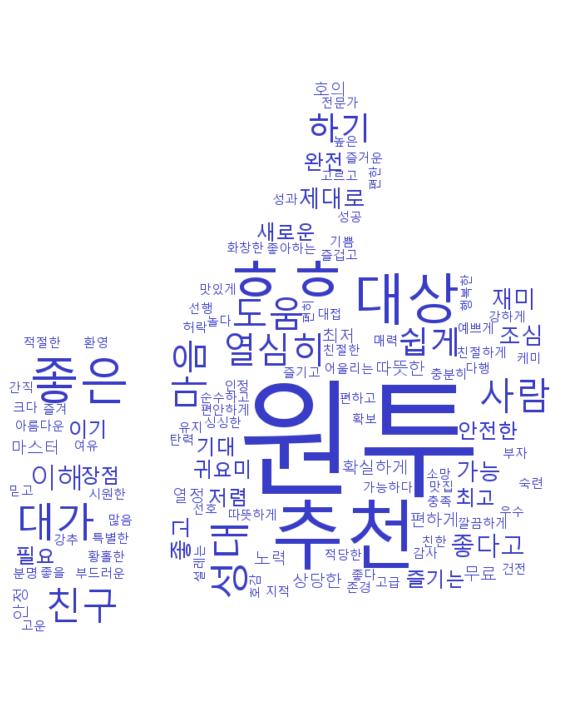

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

img_path = './py_data/sentimental/like.png'
cloud_mask = np.array(Image.open(img_path))
def color_func(**kwargs):
    color = '#393cc6' # https://www.w3schools.com/colors/colors_hexadecimal.asp
    return color

wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()

In [163]:
temp_dic = {}
for key, value in neg_count.items():
    if (key not in stopwords3)&(len(key)>1):
        temp_dic[key] = value
neg_count = temp_dic

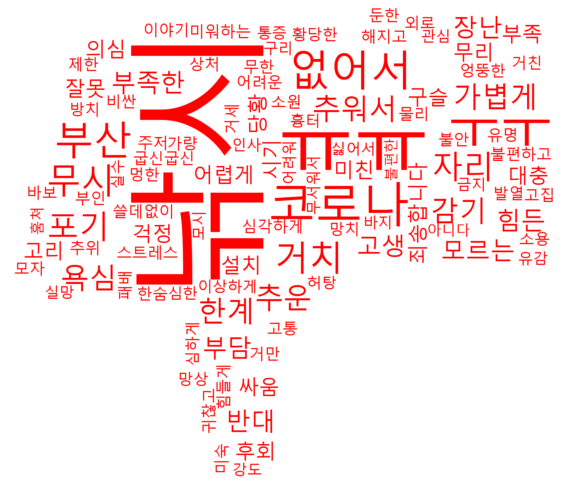

In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

img_path = './py_data/sentimental/dislike.png'
cloud_mask = np.array(Image.open(img_path))
def color_func(**kwargs):
    color = '#ff0000' # https://www.w3schools.com/colors/colors_hexadecimal.asp
    return color

wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask, max_font_size=500)
wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()